In [7]:
# !pip install panda

In [8]:
import pandas as pd


In [9]:
data = pd.read_csv('/content/decisiontree_1.csv')
encoding = {"mesin": {"bensin" : 0, "diesel": 1},
            "penggerak" : {"depan" : 0, "belakang" : 1}}
data.replace(encoding, inplace=True)

In [10]:
data.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [11]:
x = data.drop(['ID','label'], axis=1)
y = data['label']

In [17]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3)

In [18]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
y_predict = model.predict(x_test)
y_predict

array(['sedan', 'minibus', 'sedan', 'minibus', 'sedan', 'minibus',
       'minibus', 'minibus', 'minibus', 'sedan'], dtype=object)

In [20]:
import sklearn.metrics as met
print (met.accuracy_score(y_test, y_predict))

1.0


In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

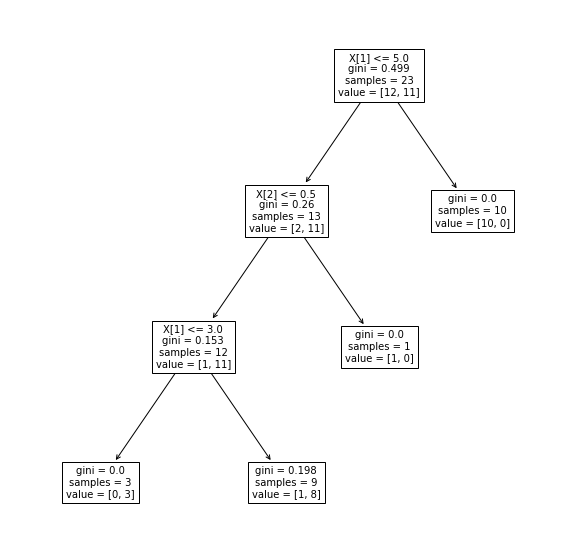

In [22]:
plt.subplots(figsize=(10,10))
tree.plot_tree(model, fontsize=10)
plt.show()